In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset from:
# https://www.cdc.gov/nchs/nvss/vsrr/prov-drug-involved-mortality.htm

# Load dataset
df = pd.read_csv("provisional_drug_overdose_death_counts_for_specific_drugs.csv", sep = ",")

In [ ]:
df.head(6)

,data_as_of,death_year,death_month,jurisdiction_occurrence,drug_involved,time_period,month_ending_date,drug_overdose_deaths,footnote
0,01/05/2025,2019,1,United States,Cocaine,12 month-ending,01/31/2019,"15,613",NaN
1,01/05/2025,2019,1,United States,Fentanyl,12 month-ending,01/31/2019,"30,367",NaN
2,01/05/2025,2019,1,United States,Gabapentin,12 month-ending,01/31/2019,"1,935",NaN
3,01/05/2025,2019,1,United States,Heroin,12 month-ending,01/31/2019,"15,475",NaN
4,01/05/2025,2019,1,United States,Methamphetamine,12 month-ending,01/31/2019,"12,059",NaN
5,01/05/2025,2019,1,United States,Oxycodone,12 month-ending,01/31/2019,"5,029",NaN


In [ ]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

num_duplicates = duplicates.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

Empty DataFrame
Columns: [data_as_of, death_year, death_month, jurisdiction_occurrence, drug_involved, time_period, month_ending_date, drug_overdose_deaths, footnote]
Index: []
Number of duplicate rows: 0


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
data_as_of                    0
death_year                    0
death_month                   0
jurisdiction_occurrence       0
drug_involved                 0
time_period                   0
month_ending_date             0
drug_overdose_deaths         34
footnote                   5048
dtype: int64


In [ ]:
# Check data types
df.dtypes

,0
data_as_of,object
death_year,int64
death_month,int64
jurisdiction_occurrence,object
drug_involved,object
time_period,object
month_ending_date,object
drug_overdose_deaths,object
footnote,object


In [ ]:
# Remove rows where the column jurisdiction_occurence is United States
index_df = df[df['jurisdiction_occurrence'] == 'United States'].index
df.drop(index_df, inplace=True)
df.reset_index(drop=True, inplace=True)
# df.head()

In [ ]:
# Remove unwanted columns
df = df.drop(['data_as_of', 'time_period', 'month_ending_date', 'footnote'], axis=1)
# df.head()

In [ ]:
# Rename columns
df = df.rename(columns={'death_year': 'Year',
                        'death_month': 'Month',
                        'jurisdiction_occurrence': 'Location',
                        'drug_involved': 'Drug',
                        'drug_overdose_deaths': 'Deaths'
                       })
# df.head()

In [ ]:
print(df.dtypes)

Year         int64
Month        int64
Location    object
Drug        object
Deaths      object
dtype: object


In [ ]:
min_year = df['Year'].min()
max_year = df['Year'].max()
print("Minimum Year:", min_year)
print("Maximum Year:", max_year)

Minimum Year: 2019
Maximum Year: 2024


In [ ]:
# Remove rows where the "Deaths" column is empty
df = df.dropna(subset=['Deaths'])

# df.head()

In [ ]:
# # Export CSV
# df.to_csv('drug_od_data', index=False)

In [ ]:
# Remove commas and convert 'Deaths' to integer data type
df['Deaths'] = df['Deaths'].str.replace(',', '').astype(int)
df.head(11)

,Year,Month,Location,Drug,Deaths
0,2019,1,Region 1,Fentanyl,3420
1,2019,2,Region 1,Fentanyl,3434
2,2019,3,Region 1,Fentanyl,3443
3,2019,4,Region 1,Fentanyl,3440
4,2019,5,Region 1,Fentanyl,3439
5,2019,6,Region 1,Fentanyl,3461
6,2019,7,Region 1,Fentanyl,3464
7,2019,8,Region 1,Fentanyl,3539
8,2019,9,Region 1,Fentanyl,3553
9,2019,10,Region 1,Fentanyl,3620


In [ ]:
# Check data types
df.dtypes

,0
Year,int64
Month,int64
Location,object
Drug,object
Deaths,int64


In [ ]:
# Summary statistics of death counts by drug type

from scipy.stats import skew

# Compute summary statistics per drug type
summary_stats_per_drug = df.groupby("Drug")["Deaths"].agg(
    ["mean", "median", "var", "std", "min", "max", "count", "skew"]
)

# Rename columns
summary_stats_per_drug.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "min": "Min",
    "max": "Max",
    "count": "Count",
    "skew": "Skewness",
}, inplace=True)

# Display the results
print(summary_stats_per_drug)

                        Mean  Median      Variance  Standard Deviation  Min  \
Drug                                                                          
Cocaine          2420.171212  2073.5  3.619582e+06         1902.519972  185   
Fentanyl         5888.439394  4805.0  2.074133e+07         4554.265385  200   
Gabapentin        366.993939   296.5  8.891843e+04          298.191931   33   
Heroin            998.357576   744.5  6.144722e+05          783.882791   36   
Methamphetamine  2601.101515  1726.5  5.653825e+06         2377.777224  114   
Oxycodone         469.116667   387.0  1.162834e+05          341.003549  119   
Xylazine          346.108626   112.0  1.851760e+05          430.320823   10   

                   Max  Count  Skewness  
Drug                                     
Cocaine           7090    660  0.651631  
Fentanyl         18317    660  0.896198  
Gabapentin        1307    660  1.615163  
Heroin            3269    660  0.944672  
Methamphetamine   8924    660  1.280

<Figure size 1000x600 with 0 Axes>

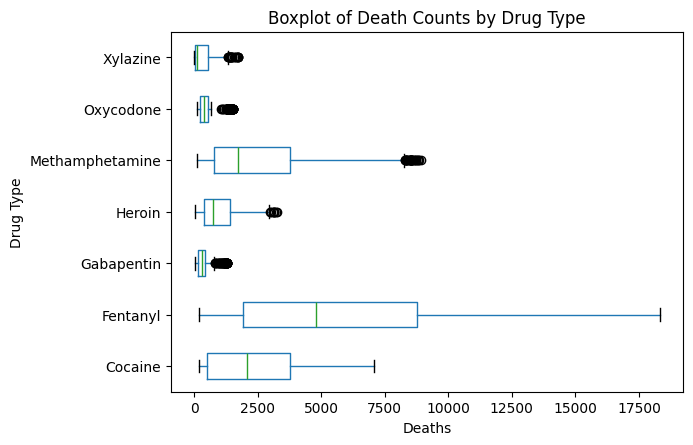

In [ ]:
# Boxplots of death counts by drug type

plt.figure(figsize=(10, 6))
df.boxplot(column='Deaths', by='Drug', vert=False, grid=False)
plt.title("Boxplot of Death Counts by Drug Type")
plt.suptitle("")
plt.xlabel("Deaths")
plt.ylabel("Drug Type")
plt.show()

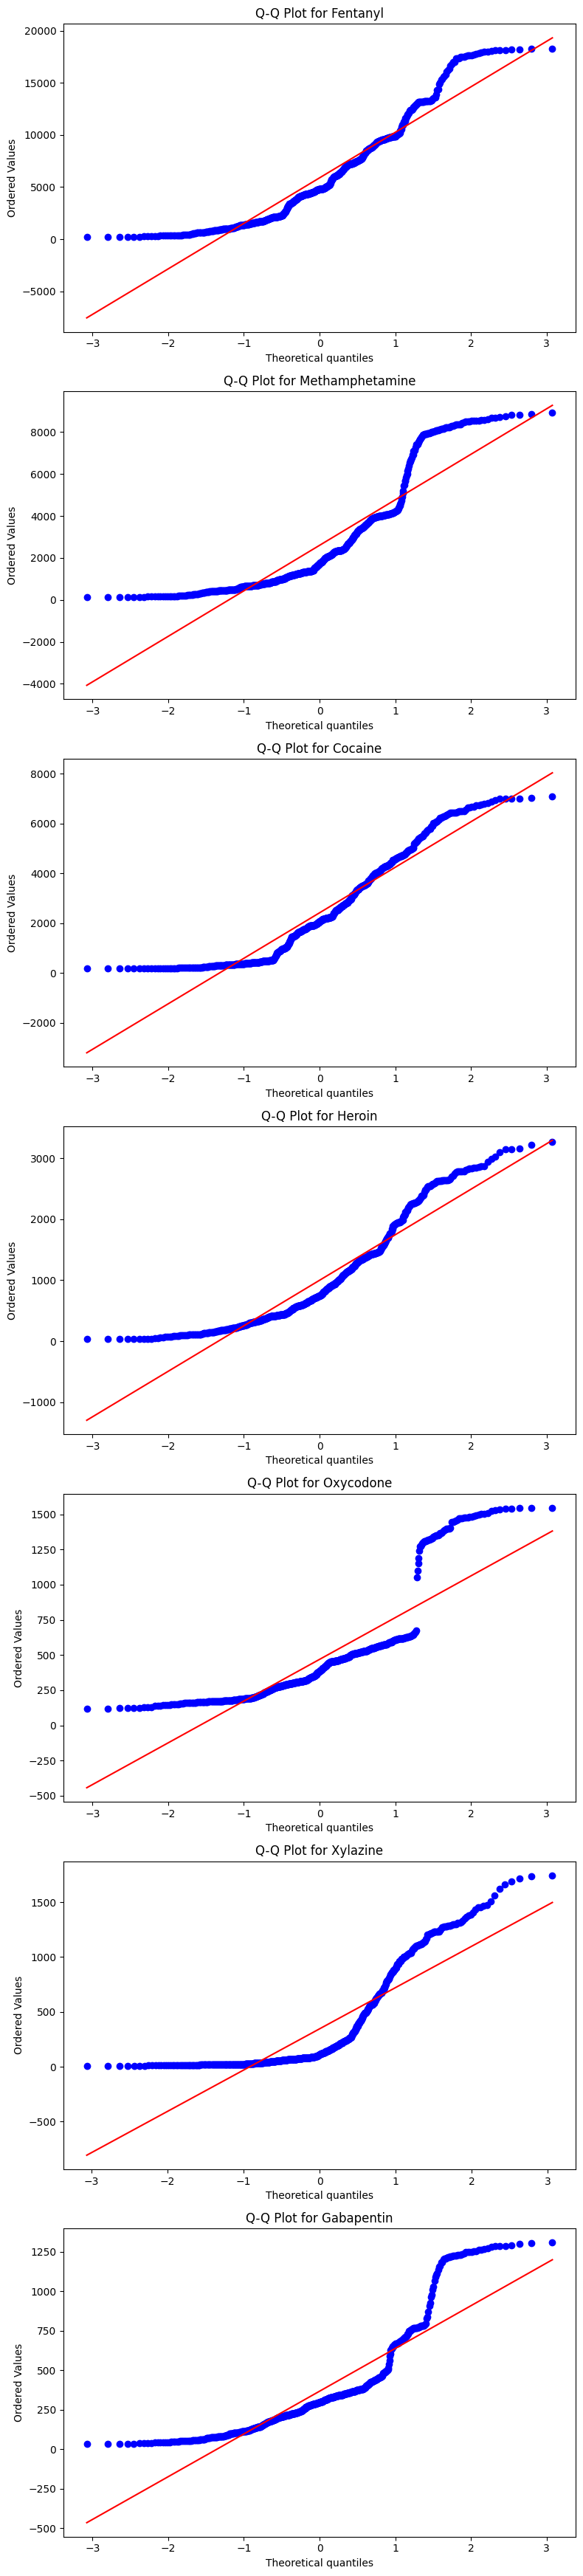

In [ ]:
import scipy.stats as stats

# Get unique drug types
drugs = df["Drug"].unique()

# Create Q-Q plots for each drug type
fig, axes = plt.subplots(nrows=len(drugs), ncols=1, figsize=(8, 5 * len(drugs)))

for i, drug in enumerate(drugs):
    ax = axes[i] if len(drugs) > 1 else axes
    drug_data = df[df["Drug"] == drug]["Deaths"].dropna()

    stats.probplot(drug_data, dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot for {drug}")

plt.tight_layout()
plt.show()


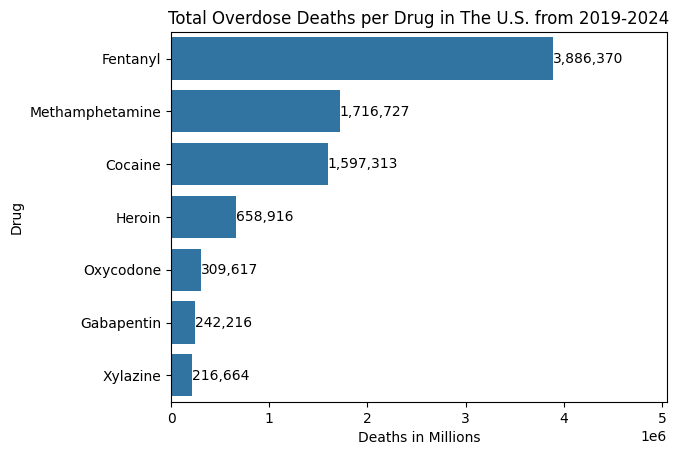

In [ ]:
df_grouped = df.groupby('Drug', as_index=False)['Deaths'].sum()

# Sort in descending order
df_grouped = df_grouped.sort_values(by='Deaths', ascending=False)

# Plot the aggregated deaths per drug
ax = sns.barplot(data=df_grouped, x='Deaths', y='Drug', orient='h')
plt.title("Total Overdose Deaths per Drug in The U.S. from 2019-2024")
plt.xlabel('Deaths in Millions')

# Add data labels at the end of each bar
for index, value in enumerate(df_grouped['Deaths']):
    ax.text(value, index, f'{value:,.0f}', va='center')

# Make room for data labels
plt.xlim(0, df_grouped['Deaths'].max() * 1.3)

plt.show()

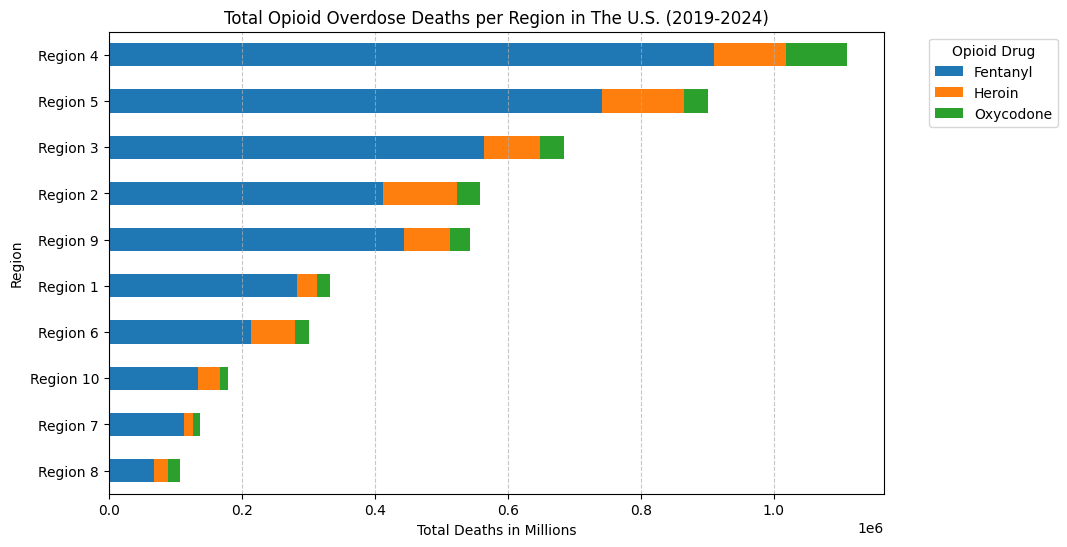

In [ ]:
# List of opioid drugs
opioid_drugs = ["Fentanyl", "Heroin", "Oxycodone", "Morphine", "Hydrocodone", "Methadone", "Buprenorphine", "Tramadol"]

# Filter the dataset to only include opioid-related deaths
df_opioids = df[df['Drug'].isin(opioid_drugs)]

# Aggregate deaths per region and opioid drug
df_grouped_opioids = df_opioids.groupby(['Location', 'Drug'])['Deaths'].sum().unstack()

# Sort regions by total deaths (sum across opioid drugs)
df_grouped_opioids['Total_Deaths'] = df_grouped_opioids.sum(axis=1)
df_grouped_opioids = df_grouped_opioids.sort_values(by='Total_Deaths', ascending=True)
df_grouped_opioids = df_grouped_opioids.drop(columns=['Total_Deaths'])  # Remove extra column

df_grouped_opioids.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.title("Total Opioid Overdose Deaths per Region in The U.S. (2019-2024)")
plt.xlabel("Total Deaths in Millions")
plt.ylabel("Region")
plt.legend(title="Opioid Drug", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
